In [1]:
# To look at 00:00 to 06:00 on the 7th August 2020

import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import colors  # For consistency with Harris et. al 2022
import netCDF4 as nc
from datetime import datetime, timedelta
# from os.path import exists
# import xarray as xr
# from properscoring import crps_ensemble
# from scipy.interpolate import interp2d
# from scipy.interpolate import LinearNDInterpolator
# from scipy.spatial import Delaunay
from properscoring import crps_ensemble

In [141]:
save_plots = True
plot_dir = "/home/c/cooperf/Documents/SurfaceBias/Kenya/plots/example_Aug_2020"

# To be consistent with the Harris et. al paper.
value_range_precip = (0.1, 15)

In [106]:
# Load IMERG latitudes and longitudes
file_name = f"/home/c/cooperf/Harris/IMERG-regICPAC-6hr/20200807_00.nc4"
nc_file = nc.Dataset(file_name)
latitude = np.array(nc_file["lat"][:])
longitude = np.array(nc_file["lon"][:])
precip_IMERG = np.array(nc_file["precipitationCal"][:])
nc_file.close()

# Load the IFS latitudes and longitudes, ensemble member 0
file_name = f"/home/c/cooperf/IFS/IFS-regICPAC-ens-tp/2020/tp_8.nc"
nc_file = nc.Dataset(file_name)
latitude_IFS = np.array(nc_file["latitude"][1:])
longitude_IFS = np.array(nc_file["longitude"][:])
time_IFS = np.array(nc_file["time"][5])  # Hours since 1900
valid_time_IFS = np.array(nc_file["valid_time"][5,4:6])
precip_accum_IFS = np.array(nc_file["tp"][5,:,4:6,1:,:])
nc_file.close()

# Convert from m to mm/h
precip_IFS = (precip_accum_IFS[:,1,:,:] - precip_accum_IFS[:,0,:,:])*1000/6

# Load the GAN ensemble forecast, ensemble member 0
day_of_year = (datetime(2020,8,6)-datetime(2020,1,1)).days
file_name = f"/home/c/cooperf/data/cGAN/ICPAC/6h_IMERG_v6_Andrew/GAN_forecasts/GAN_{day_of_year}.nc"
nc_file = nc.Dataset(file_name)
latitude_GAN = np.array(nc_file["latitude"][:])
longitude_GAN = np.array(nc_file["longitude"][:])
time_GAN = np.array(nc_file["time"][:])  # Hours since 1900
valid_time_GAN = np.array(nc_file["fcst_valid_time"][0,0])
precip_GAN = np.array(nc_file["precipitation"][0,:,0,:,:])
nc_file.close()

In [107]:
# Check that the forecast initialisation is at the correct time
print(datetime(1900,1,1) + timedelta(hours=int(time_GAN)))
print(datetime(1900,1,1) + timedelta(hours=int(time_IFS)))

2020-08-06 00:00:00
2020-08-06 00:00:00


In [108]:
# Check that the forecast is valid at the correct time
print(datetime(1900,1,1) + timedelta(hours=int(valid_time_GAN)))
print(datetime(1900,1,1) + timedelta(hours=int(valid_time_IFS[0])))

2020-08-07 00:00:00
2020-08-07 00:00:00


In [137]:
# Don't plot rainfall below 0.1 mm/h
precip_IMERG[precip_IMERG<0.1] = 0
precip_IFS[precip_IFS<0.1] = 0
precip_GAN[precip_GAN<0.1] = 0

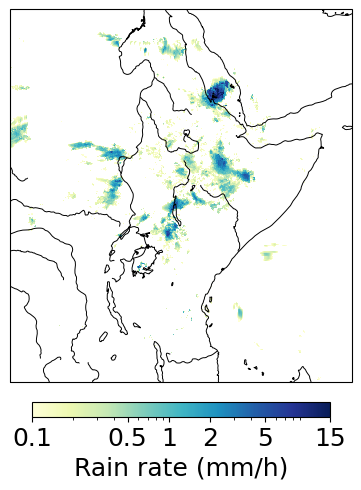

In [151]:
fig = plt.figure(layout="constrained")
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_facecolor('white')  # For consistency with Harris et. al 2022
#ax.gridlines()
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
#ax.add_feature(cfeature.BORDERS, linewidth=0.7)
ax.add_feature(cfeature.RIVERS, linewidth=0.7,edgecolor='black')
ax.add_feature(cfeature.LAKES, linewidth=0.7,linestyle='-',edgecolor='black',facecolor='none')

c = plt.pcolormesh(longitude, latitude, precip_IMERG,
                   norm=colors.LogNorm(*value_range_precip),
                    transform=ccrs.PlateCarree(), cmap='YlGnBu')



# plt.title("IMERG", fontdict = {'fontsize':20})
cb = plt.colorbar(c, fraction=0.04, location='bottom', ticks=[0.1,0.5,1,2,5,15])
cb.ax.tick_params(labelsize=18)
cb.ax.set_xticklabels([0.1,0.5,1,2,5,15])
cb.set_label('Rain rate (mm/h)',size=18)


if save_plots:
    #plt.savefig(f"{plot_dir}/IMERG.png", format="png", bbox_inches='tight',dpi=600)
    #plt.savefig(f"{plot_dir}/IMERG.pdf", format="pdf", bbox_inches='tight',dpi=600)
    plt.savefig(f"{plot_dir}/IMERG_no_border.png", format="png", bbox_inches='tight',dpi=600)
    plt.savefig(f"{plot_dir}/IMERG_no_border.pdf", format="pdf", bbox_inches='tight',dpi=600)

plt.show()

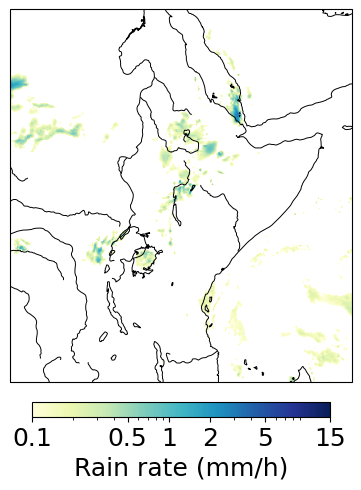

In [152]:
fig = plt.figure(layout="constrained")
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_facecolor('white')  # For consistency with Harris et. al 2022
#ax.gridlines()
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
#ax.add_feature(cfeature.BORDERS, linewidth=0.7)
ax.add_feature(cfeature.RIVERS, linewidth=0.7,edgecolor='black')
ax.add_feature(cfeature.LAKES, linewidth=0.7,linestyle='-',edgecolor='black',facecolor='none')

c = plt.pcolormesh(longitude, latitude, precip_IFS[1,:,:],
                   norm=colors.LogNorm(*value_range_precip),
                   transform=ccrs.PlateCarree(), cmap='YlGnBu')

# plt.title("IFS", fontdict = {'fontsize':20})
cb = plt.colorbar(c, fraction=0.04, location='bottom', ticks=[0.1,0.5,1,2,5,15])
cb.ax.tick_params(labelsize=18)
cb.ax.set_xticklabels([0.1,0.5,1,2,5,15])
cb.set_label('Rain rate (mm/h)',size=18)

if save_plots:
    #plt.savefig(f"{plot_dir}/IFS.png", format="png", bbox_inches='tight',dpi=600)
    #plt.savefig(f"{plot_dir}/IFS.pdf", format="pdf", bbox_inches='tight',dpi=600)
    plt.savefig(f"{plot_dir}/IFS_no_border.png", format="png", bbox_inches='tight',dpi=600)
    plt.savefig(f"{plot_dir}/IFS_no_border.pdf", format="pdf", bbox_inches='tight',dpi=600)

plt.show()

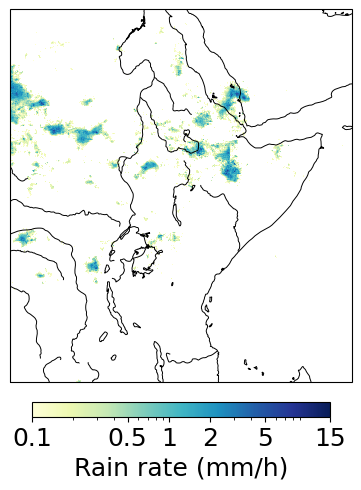

In [153]:
fig = plt.figure(layout="constrained")
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_facecolor('white')  # For consistency with Harris et. al 2022
#ax.gridlines()
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
#ax.add_feature(cfeature.BORDERS, linewidth=0.7)
ax.add_feature(cfeature.RIVERS, linewidth=0.7,edgecolor='black')
ax.add_feature(cfeature.LAKES, linewidth=0.7,linestyle='-',edgecolor='black',facecolor='none')

c = plt.pcolormesh(longitude, latitude, precip_GAN[1,:,:],
                   norm=colors.LogNorm(*value_range_precip),
                   transform=ccrs.PlateCarree(), cmap='YlGnBu')

# plt.title("GAN", fontdict = {'fontsize':20})
cb = plt.colorbar(c, fraction=0.04, location='bottom', ticks=[0.1,0.5,1,2,5,15])
cb.ax.tick_params(labelsize=18)
cb.ax.set_xticklabels([0.1,0.5,1,2,5,15])
cb.set_label('Rain rate (mm/h)',size=18)

if save_plots:
    #plt.savefig(f"{plot_dir}/GAN.png", format="png", bbox_inches='tight',dpi=600)
    #plt.savefig(f"{plot_dir}/GAN.pdf", format="pdf", bbox_inches='tight',dpi=600)
    plt.savefig(f"{plot_dir}/GAN_no_border.png", format="png", bbox_inches='tight',dpi=600)
    plt.savefig(f"{plot_dir}/GAN_no_border.pdf", format="pdf", bbox_inches='tight',dpi=600)

plt.show()